In [155]:
from math import isnan
from functools import total_ordering
import calendar
import zipfile
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from datetime import datetime
import datetime

In [26]:
df = pd.read_csv('MSFT.csv', sep=",", index_col=False).filter(['UnderlyingPrice', 'Type', 'Expiration',
                   'DataDate', 'Strike', 'Last', 'Bid', 'Ask', 'Volume', 'OpenInterest', 'IV', 'Delta', 'Gamma',
                   'Theta', 'Vega'])

In [43]:
df

,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega
0,59.80,call,2016-11-04,2016-11-01,49.5,10.40,9.65,10.65,0,2,0.2951,1.0000,0.0000,-0.4497,0.0000
1,59.80,put,2016-11-04,2016-11-01,49.5,0.01,0.00,0.01,0,36,0.3362,0.0000,0.0000,0.0000,0.0000
2,59.80,call,2016-11-04,2016-11-01,50.0,0.00,9.20,10.15,0,0,0.2951,1.0000,0.0000,-0.4542,0.0000
3,59.80,put,2016-11-04,2016-11-01,50.0,0.09,0.00,0.02,0,22,0.3362,0.0000,0.0000,0.0000,0.0000
4,59.80,call,2016-11-04,2016-11-01,50.5,7.50,8.65,9.70,0,32,0.2951,1.0000,0.0000,-0.4588,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715049,336.32,put,2024-01-19,2021-12-31,490.0,0.00,160.50,165.00,0,0,0.2443,-0.8142,0.0023,-7.1235,128.8851
1715050,336.32,call,2024-01-19,2021-12-31,500.0,12.70,11.45,13.00,188,1572,0.2680,0.2019,0.0022,-8.9336,135.6033
1715051,336.32,put,2024-01-19,2021-12-31,500.0,188.38,169.50,173.35,0,12,0.2421,-0.8322,0.0022,-6.5597,120.8254
1715052,336.32,call,2024-01-19,2021-12-31,520.0,10.50,9.40,10.90,97,1665,0.2674,0.1736,0.0020,-8.1165,123.5219


In [28]:
df['Expiration'] = pd.to_datetime(df['Expiration'])
df['DataDate'] = pd.to_datetime(df['DataDate'])

In [29]:
df2 = df.drop_duplicates(subset='DataDate', keep='first').filter(['DataDate', 'UnderlyingPrice'])

In [30]:
df2 = df2.set_index('DataDate')

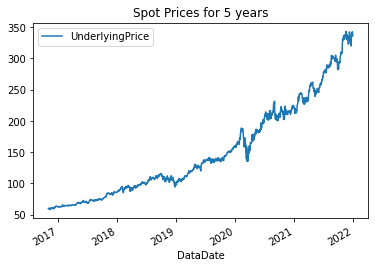

In [31]:
df2.plot()
plt.title('Spot Prices for 5 years')
plt.show()

In [219]:
df_1 = df.loc[df['Theta'] > 0]
df_2 = df_1.loc[df_1['Delta'] > 0.999]
df_3 = df_2.loc[df_2['Type'] == "call"]
df_3 = df_3.loc[df_3['Volume'] > 0]

In [220]:
df_3

,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega
12646,61.120,call,2017-01-20,2016-11-22,35.0,26.15,26.05,26.30,5,587,0.3331,0.9991,0.0000,0.0258,0.0011
22004,61.970,call,2016-12-30,2016-12-09,53.0,8.60,9.00,9.15,80,12,0.1953,0.9991,0.0004,0.1044,0.0172
31768,62.990,call,2017-01-20,2016-12-28,30.0,32.95,32.95,33.05,24,401,0.2017,0.9996,0.0000,0.0679,0.0000
32622,62.900,call,2017-01-20,2016-12-29,30.0,32.80,32.80,32.95,40,401,0.1974,0.9997,0.0000,0.0673,0.0000
33456,62.165,call,2017-01-20,2016-12-30,30.0,32.15,32.10,32.30,30,368,0.2679,0.9997,0.0000,0.0025,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713806,336.320,call,2022-03-18,2021-12-31,200.0,137.75,134.70,139.00,5,1286,0.2969,0.9996,0.0000,0.2435,0.0311
1713808,336.320,call,2022-03-18,2021-12-31,205.0,131.95,129.75,134.00,1,155,0.2969,0.9996,0.0000,0.2151,0.0621
1713810,336.320,call,2022-03-18,2021-12-31,210.0,128.22,124.65,129.00,5,389,0.2969,0.9995,0.0000,0.1690,0.1182
1714316,336.320,call,2022-09-16,2021-12-31,80.0,257.35,254.70,258.70,5,210,0.3602,0.9993,0.0000,0.2116,0.0007


In [32]:
dfCall = df.loc[df['Type'] == "call"]

In [33]:
dfCall['Days'] = (dfCall['Expiration'] - dfCall['DataDate']).astype('timedelta64[D]').astype(int)

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_21052/2410201231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCall['Days'] = (dfCall['Expiration'] - dfCall['DataDate']).astype('timedelta64[D]').astype(int)


In [39]:
dfCallGrouped = dfCall.groupby('DataDate').apply(lambda x: x.groupby('Days').apply(lambda g: g.iloc[(g['Delta'] - 0.5).abs().argsort()[:1]]))

In [44]:
df2 = dfCallGrouped

In [49]:
df2

UnderlyingPrice Expiration   DataDate  Strike   Last  \
DataDate   Days                                                                 
2016-11-01 3    42                 59.80 2016-11-04 2016-11-01    60.0   0.37   
           10   124                59.80 2016-11-11 2016-11-01    60.0   0.81   
           17   224                59.80 2016-11-18 2016-11-01    59.5   0.95   
           24   308                59.80 2016-11-25 2016-11-01    59.5   1.53   
           31   380                59.80 2016-12-02 2016-11-01    59.5   1.15   
...                                  ...        ...        ...     ...    ...   
2021-12-31 259  1714422           336.32 2022-09-16 2021-12-31   345.0  27.20   
           385  1714574           336.32 2023-01-20 2021-12-31   350.0  32.75   
           441  1714724           336.32 2023-03-17 2021-12-31   355.0  30.00   
           532  1714870           336.32 2023-06-16 2021-12-31   355.0  38.40   
           749  1715008           336.32 2024-01-19 2021-12-31   365.0  47.70   

                           Bid    Ask  Volume  OpenInterest      IV   Delta  \
DataDate   Days                                                               
2016-11-01 3    42        0.31   0.37    8134          4904  0.2256  0.4314   
           10   124       0.76   0.84     878          1959  0.2329  0.4742   
           17   224       1.12   1.16     453           339  0.2137  0.5265   
           24   308       1.17   1.23       0           616  0.1932  0.5185   
           31   380       1.28   1.35       4            39  0.1880  0.5154   
...                        ...    ...     ...           ...     ...     ...   
2021-12-31 259  1714422  26.25  29.00      57           755  0.2785  0.5034   
           385  1714574  30.25  34.00     181          4765  0.2756  0.5003   
           441  1714724  31.05  35.00       0          1095  0.2755  0.4911   
           532  1714870  36.55  39.75       5          1498  0.2821  0.5067   
           749  1715008  41.00  45.50       0           274  0.2827  0.5027   

                          Gamma    Theta      Vega  Days  
DataDate   Days                                           
2016-11-01 3    42       0.3644 -33.3893    1.8792     3  
           10   124      0.1788 -17.5871    3.8069    10  
           17   224      0.1467  -9.9672    5.0176    17  
           24   308      0.1358  -7.2651    5.9981    24  
           31   380      0.1224  -6.2155    6.8375    31  
...                         ...      ...       ...   ...  
2021-12-31 259  1714422  0.0051 -22.2149  112.7978   259  
           385  1714574  0.0042 -18.0305  137.5554   385  
           441  1714724  0.0039 -16.9910  147.3328   441  
           532  1714870  0.0035 -15.8515  161.8596   532  
           749  1715008  0.0029 -13.4048  192.1119   749  

[21442 rows x 15 columns]

In [54]:
max_days = df2.loc[df2['Days'].idxmax()]['Days']
print(f'Max days expiration is {max_days}')

Max days expiration is 945


In [192]:
greeks = {}

for i in range(1, max_days + 1):
    frame = df2[df2.index.isin([i], level='Days')]
    count = frame.Delta.count()
    if count < 100:
        continue
    delta = frame.Delta.mean()
    gamma = frame.Gamma.mean()
    theta = frame.Theta.mean()
    vega = frame.Vega.mean()
    greeks[i] = [delta, gamma, theta, vega, count]

dfGreeks = pd.DataFrame.from_dict(greeks, orient='index', columns=['Delta', 'Gamma', 'Theta', 'Vega', 'Count'])

In [193]:
dfGreeks

,Delta,Gamma,Theta,Vega,Count
1,0.508513,0.293932,-460.915591,1.769199,263
2,0.492150,0.221183,-163.152034,3.608902,266
3,0.502094,0.183372,-115.041570,4.796059,267
4,0.495077,0.159783,-93.496116,5.726578,235
7,0.499228,0.141272,-54.689635,7.890814,262
8,0.505683,0.117421,-54.391360,8.525506,263
9,0.496934,0.110682,-51.659346,9.112537,266
10,0.502108,0.104470,-48.911450,9.652437,267
11,0.499097,0.099522,-46.533618,10.129639,235
14,0.498810,0.094503,-37.669044,11.452535,261


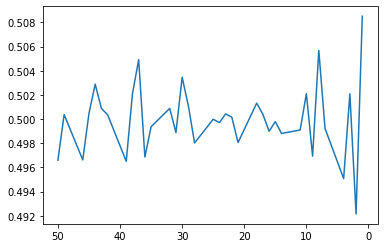

In [194]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Delta'])
plt.show()

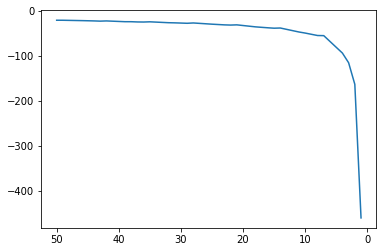

In [195]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Theta'])
plt.show()

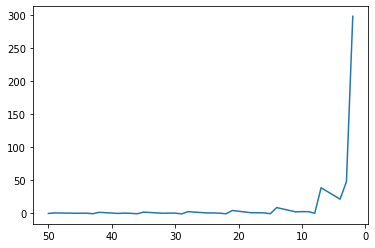

In [198]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Theta'].diff())
plt.show()

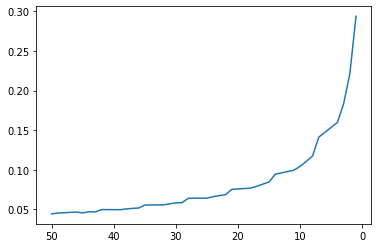

In [196]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Gamma'])
plt.show()

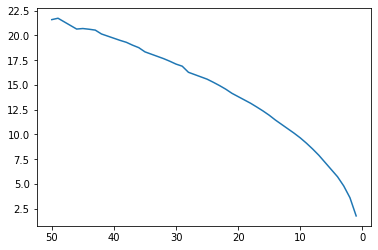

In [197]:
plt.gca().invert_xaxis()
plt.plot(dfGreeks['Vega'])
plt.show()

In [162]:
 df2['Weekday'] = df2['DataDate'].dt.day_name()

UnderlyingPrice Expiration   DataDate  Strike   Last  \
DataDate   Days                                                                 
2016-11-01 3    42                 59.80 2016-11-04 2016-11-01    60.0   0.37   
           10   124                59.80 2016-11-11 2016-11-01    60.0   0.81   
           17   224                59.80 2016-11-18 2016-11-01    59.5   0.95   
           24   308                59.80 2016-11-25 2016-11-01    59.5   1.53   
           31   380                59.80 2016-12-02 2016-11-01    59.5   1.15   
...                                  ...        ...        ...     ...    ...   
2021-12-31 259  1714422           336.32 2022-09-16 2021-12-31   345.0  27.20   
           385  1714574           336.32 2023-01-20 2021-12-31   350.0  32.75   
           441  1714724           336.32 2023-03-17 2021-12-31   355.0  30.00   
           532  1714870           336.32 2023-06-16 2021-12-31   355.0  38.40   
           749  1715008           336.32 2024-01-19 2021-12-31   365.0  47.70   

                           Bid    Ask  Volume  OpenInterest      IV   Delta  \
DataDate   Days                                                               
2016-11-01 3    42        0.31   0.37    8134          4904  0.2256  0.4314   
           10   124       0.76   0.84     878          1959  0.2329  0.4742   
           17   224       1.12   1.16     453           339  0.2137  0.5265   
           24   308       1.17   1.23       0           616  0.1932  0.5185   
           31   380       1.28   1.35       4            39  0.1880  0.5154   
...                        ...    ...     ...           ...     ...     ...   
2021-12-31 259  1714422  26.25  29.00      57           755  0.2785  0.5034   
           385  1714574  30.25  34.00     181          4765  0.2756  0.5003   
           441  1714724  31.05  35.00       0          1095  0.2755  0.4911   
           532  1714870  36.55  39.75       5          1498  0.2821  0.5067   
           749  1715008  41.00  45.50       0           274  0.2827  0.5027   

                          Gamma    Theta      Vega  Days  Weekday  
DataDate   Days                                                    
2016-11-01 3    42       0.3644 -33.3893    1.8792     3  Tuesday  
           10   124      0.1788 -17.5871    3.8069    10  Tuesday  
           17   224      0.1467  -9.9672    5.0176    17  Tuesday  
           24   308      0.1358  -7.2651    5.9981    24  Tuesday  
           31   380      0.1224  -6.2155    6.8375    31  Tuesday  
...                         ...      ...       ...   ...      ...  
2021-12-31 259  1714422  0.0051 -22.2149  112.7978   259   Friday  
           385  1714574  0.0042 -18.0305  137.5554   385   Friday  
           441  1714724  0.0039 -16.9910  147.3328   441   Friday  
           532  1714870  0.0035 -15.8515  161.8596   532   Friday  
           749  1715008  0.0029 -13.4048  192.1119   749   Friday  

[21442 rows x 16 columns]